# Example of cut and flow analysis with HydroRoot

>- In the following there are successive cells with code lines to run and some explanations.
>- Cells with code lines have a number at their top left corner
>- Run the cells with code lines with Ctrl+Enter

## First: some needed code
- to indicate where are the library files of HydroRoot
- to display inline plots in the notebook

In [1]:
import sys;
# to indicate where are the library files of HydrRoot
sys.path.extend(['../src']) 

# to display inline plots in the notebook
%matplotlib inline

## Before running the script

- prepare the input yaml file
- add the experimental data point to the comma separated csv file data/cnf_data.csv

### Yaml file:
It contains different input categories that are explained in the example hydroroot/example/parameters_Ctr-3P2.yml.
>modify and duplicate the file

### the cnf_data file:
>Download *data/cnf_data.csv*, add the data and upload it back

csv file containing cut and flow:

**mendatory columns**:
- arch: name of the architecture file without extension. The file given in 'input_file' of the yaml file
- dP_Mpa: column with the working cut and flow pressure
- J0, ..., Jn: columns containing the flux values, 1st for the full root, then 1st cut, 2d cut, etc.
- lcut1, ...., lcutn: columns containing the maximum length to the base after each cut, 1st cut, 2d cut, etc. (not length for full root)

**optional columns**
- last columns **used only if dP is not constant**:
    - dP0, dP1,.., dPn: containing the working pressure of each steps: full root, 1st cut, 2d cut, etc.
    
**Example**

|arch|dP_Mpa|J0|J1|J2|J3|J4|J5|J6|J7|J8|J9|lcut1|lcut2|lcut3|lcut4|lcut5|lcut6|lcut7|lcut8|lcut9|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|Exp03_P2|0.2|0.1|0.11|0.1|0.1|0.12|0.18|||||0.37|0.3|0.25|0.2|0.14|||||
|Exp05_P13|0.3|0.01|0.01|0.01|0.02|0.01|0.02|||||0.26|0.22|0.18|0.14|0.11|||||

## Run the script: direct simulation
- argument '-o': name of the output csv file

Simulation runs:  1
#############################
**********************
optimization finished
**********************
Exp03_P2.txt 0.434 174.7 3.979 0.005643500494241343 0.10353098834266657
Exp03_P2.txt 0.37 174.7 3.9130000000000003 0.005425788123347491 0.10467399178667064
Exp03_P2.txt 0.3 174.7 3.835 0.005185380887124098 0.10747427697823222
Exp03_P2.txt 0.25 174.7 3.694 0.004912382768712372 0.11072095912537126
Exp03_P2.txt 0.2 174.7 3.45 0.0045170698819257445 0.12005190196164413
Exp03_P2.txt 0.14 174.7 2.998 0.003853640911711085 0.17640647357761388


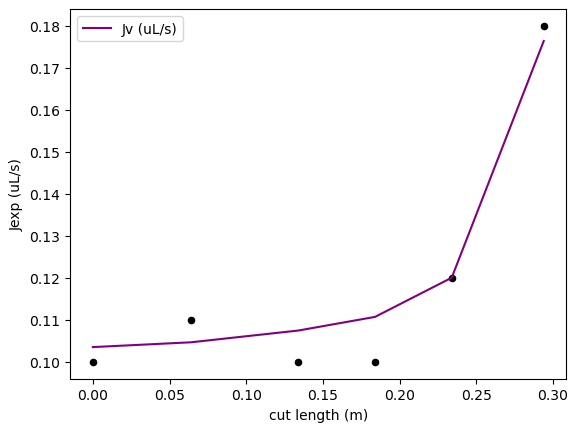

running time is  1.5956177711486816


<Figure size 640x480 with 0 Axes>

In [2]:
%run adjustment_K_and_k.py parameters_Ctr-3P2.yml -o results.csv

## Display architecture
Options:
- cut='tot' is the full root, then cut is the cut length
- prop: property to display
- perspective: activate the zoom
- azimut: axial rotation
- elevation: rotation with the root base as center of rotation
- line_width: lines width

In [3]:
plot_architecture()

interactive(children=(Dropdown(description='cut', options=('tot', '0.37', '0.3', '0.25', '0.2', '0.14'), value…

## Run adjustment
- adjust the radial and axial conductance
- argument:
    - '-op': indicate to run optimization
    - '-o': name of the output csv file

Simulation runs:  1
#############################
finished minimize ax, ar [1.03756618 0.91692836]
**********************************


/home/fabrice/miniconda2/envs/hydroroot39/lib/python3.9/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Simu,  160.18738423419578 7.50105473248557e-05 160.20791606445044 dk0 =  0.00042155605360652684 dKx =  0.004377972589953915
**********************
optimization finished
**********************
Exp03_P2.txt 0.434 160.20791606445044 3.979 0.005643500494241343 0.10249510055582152
Exp03_P2.txt 0.37 160.20791606445044 3.9130000000000003 0.005425788123347491 0.10249511094979373
Exp03_P2.txt 0.3 160.20791606445044 3.835 0.005185380887124098 0.10249520059268012
Exp03_P2.txt 0.25 160.20791606445044 3.694 0.004912382768712372 0.10249703472863049
Exp03_P2.txt 0.2 160.20791606445044 3.45 0.0045170698819257445 0.12002125882468624
Exp03_P2.txt 0.14 160.20791606445044 2.998 0.003853640911711085 0.18000071691249506
************************************************************
radial k 1st:  174.7 , k optimized:  160.20791606445044
************************************************************


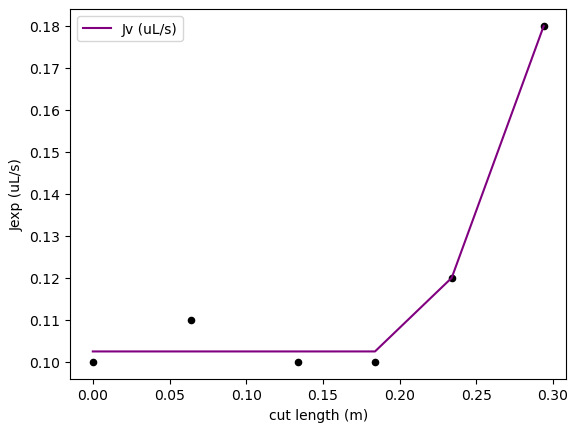

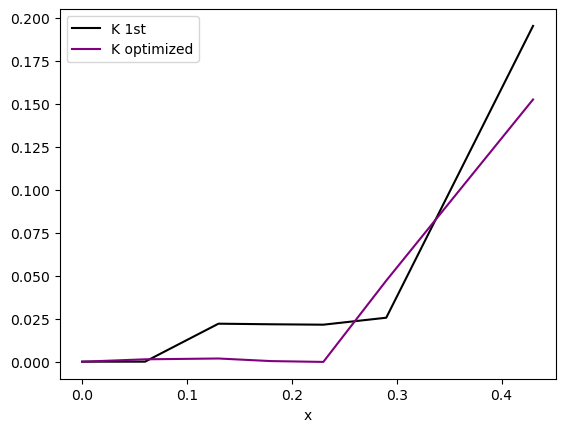

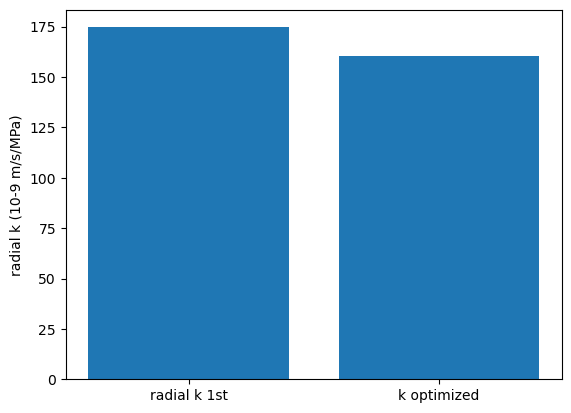

running time is  266.1438157558441


<Figure size 640x480 with 0 Axes>

In [5]:
%run adjustment_K_and_k.py parameters_Ctr-3P2.yml -op -o results.csv

In [5]:
plot_architecture()

interactive(children=(Dropdown(description='cut', options=('tot', '0.37', '0.3', '0.25', '0.2', '0.14'), value…

## Display architecture in 3D (slower)
Options:
- cut='tot' is the full root, then cut is the cut length
- prop: property to display

In [6]:
plot_3D()

interactive(children=(Dropdown(description='cut', options=('tot', '0.37', '0.3', '0.25', '0.2', '0.14'), value…